In [2]:
import pandas as pd
from FinancialMachineLearning.features.fracdiff import FractionalDifferentiatedFeatures
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("daily_train.csv")
data = data.set_index("Date")
data.index.name = None
data_ret = np.log(data.Close / data.Close.shift(1)).dropna()
data_ret.head()

1962-01-03    0.014743
1962-01-04    0.002436
1962-01-05   -0.022141
1962-01-08   -0.002491
1962-01-09   -0.002497
Name: Close, dtype: float64

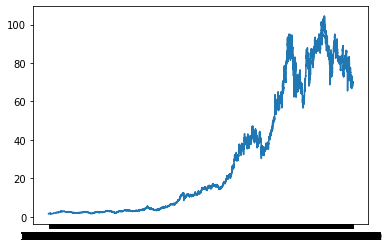

In [4]:
plt.plot(data.Close)

In [5]:
#분수 차분 계산 후, 얻어진 시계열의 정상성과 원래 데이터 간 상관성 평가
def calculate_difference(df : pd.DataFrame, end = 1, numbers = 11) :
    cols = ['adfStat','p-value','lags','nObs','95% conf', 'corr']
    out = pd.DataFrame(columns = cols)
    for d in np.linspace(0, end, numbers): #numbers개의 분수차수 생성
        try:
            df1 = np.log(df).dropna()
            #분수차분 실행(d : 분수 차수, thres : 임계값)
            df2 = FractionalDifferentiatedFeatures.fracDiff(df1, d, thres = 1e-5)
            #ADF 검정과 상관성 계산(기존 데이터와 분수 차분 데이터 간 상관계수)
            corr = np.corrcoef(df1.loc[df2.index, 'Close'], df2['Close'])[0,1]
            df2 = sm.tsa.stattools.adfuller(df2['Close'], maxlag = 1, regression = 'c', autolag = None)
            #계산된 ADF 통계량, p값, 상관계수 등 저장
            out.loc[d] = list(df2[:4]) + [df2[4]['5%']] + [corr]
        except Exception as e:
            print(f'd: {d}, error: {e}')
            continue
    return out

data_d = calculate_difference(data[['Close']], numbers = 21)

C:\Users\cksdu\OneDrive\문서\바탕 화면\FIND-A\MLFINLAB\FinancialMachineLearning\features\fracdiff.py:54: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_ = pd.Series()
C:\Users\cksdu\OneDrive\문서\바탕 화면\FIND-A\MLFINLAB\FinancialMachineLearning\features\fracdiff.py:54: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_ = pd.Series()
C:\Users\cksdu\OneDrive\문서\바탕 화면\FIND-A\MLFINLAB\FinancialMachineLearning\features\fracdiff.py:54: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_ = pd.Series()
C:\Users\cksdu\OneDrive\문서\바탕 화면\FIND-A\MLFINLAB\FinancialMachineLearning\features\fracdiff.py:54: FutureWarning: The default dtype for empty Series will be 'ob

In [6]:
data_d

,adfStat,p-value,lags,nObs,95% conf,corr
0.00,-0.892083,7.905684e-01,1.0,14597.0,-2.861738,1.000000
0.05,-0.325455,9.218210e-01,1.0,4.0,-4.474365,0.999007
0.10,-0.381350,9.131663e-01,1.0,4.0,-4.474365,0.996126
0.15,-1.720336,4.206663e-01,1.0,6.0,-3.646238,0.984297
0.20,-1.707622,4.271898e-01,1.0,8.0,-3.367187,0.967079
0.25,-4.244201,5.541346e-04,1.0,13.0,-3.127149,0.932946
0.30,-3.615943,5.463453e-03,1.0,19.0,-3.031227,0.892474
0.35,-2.630868,8.678379e-02,1.0,30.0,-2.964071,0.898378
0.40,-3.103146,2.632127e-02,1.0,47.0,-2.925338,0.841688
0.45,-4.141121,8.275645e-04,1.0,75.0,-2.900925,0.704957


,adfStat,p-value,lags,nObs,95% conf,corr
0.00,-0.892083,7.905684e-01,1.0,14597.0,-2.861738,1.000000
0.05,-0.325455,9.218210e-01,1.0,4.0,-4.474365,0.999007
0.10,-0.381350,9.131663e-01,1.0,4.0,-4.474365,0.996126
0.15,-1.720336,4.206663e-01,1.0,6.0,-3.646238,0.984297
0.20,-1.707622,4.271898e-01,1.0,8.0,-3.367187,0.967079
0.25,-4.244201,5.541346e-04,1.0,13.0,-3.127149,0.932946
0.30,-3.615943,5.463453e-03,1.0,19.0,-3.031227,0.892474
0.35,-2.630868,8.678379e-02,1.0,30.0,-2.964071,0.898378
0.40,-3.103146,2.632127e-02,1.0,47.0,-2.925338,0.841688
0.45,-4.141121,8.275645e-04,1.0,75.0,-2.900925,0.704957


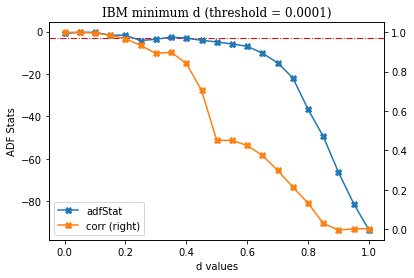

In [7]:
import matplotlib.pyplot as plt

f,ax = plt.subplots()
ax.axhline(data_d['95% conf'].mean(), lw = 1, color = 'r', ls = '-.')
data_d[['adfStat', 'corr']].plot(ax = ax, marker = 'X', secondary_y = 'corr')
ax.set_title('IBM minimum d (threshold = 0.0001)', fontsize = 12, fontfamily = 'Serif')
ax.set_xlabel('d values')
ax.set_ylabel('ADF Stats')
ax.grid(False)
display(data_d)

In [8]:
#0.45차분으로 
frac = FractionalDifferentiatedFeatures.fracDiff_FFD(data[['Close']], 0.45)
data['fracdiff'] = frac

C:\Users\cksdu\OneDrive\문서\바탕 화면\FIND-A\MLFINLAB\FinancialMachineLearning\features\fracdiff.py:34: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_ = pd.Series()


In [9]:
data

,Open,High,Low,Close,Volume,fracdiff
1962-01-02,0.000000,1.589844,1.578125,1.578125,902400,NaN
1962-01-03,0.000000,1.601563,1.578125,1.601563,1200000,NaN
1962-01-04,0.000000,1.613281,1.597656,1.605469,1088000,NaN
1962-01-05,0.000000,1.613281,1.566406,1.570313,1222400,NaN
1962-01-08,0.000000,1.582031,1.546875,1.566406,1388800,NaN
...,...,...,...,...,...,...
2019-12-24,70.349998,70.500000,69.910004,70.019997,3979400,1.434528
2019-12-26,70.190002,70.500000,70.010002,70.129997,8840200,1.598530
2019-12-27,70.199997,70.309998,69.879997,69.889999,10516100,1.304997
2019-12-30,70.089996,70.440002,69.400002,69.480003,12689400,0.981921


#### Technical Features

In [10]:
from ta.volatility import BollingerBands
from ta.volume import money_flow_index, on_balance_volume
from ta.momentum import rsi
from ta.volume import volume_weighted_average_price
from ta.momentum import tsi
from ta.volume import ease_of_movement
from ta.volume import volume_price_trend

#ibm 수익률
data['return'] = data_ret

#20일 이동평균선 기준 볼린저 밴드
indicator_bb = BollingerBands(close = data["Close"], window = 20, window_dev = 1)

data['bb_bbm'] = indicator_bb.bollinger_mavg() #중간
data['bb_bbh'] = indicator_bb.bollinger_hband() #상단
data['bb_bbl'] = indicator_bb.bollinger_lband() #하단

#MFI(Money Flow Index, 자금 흐름 지수)
#주가와 거래량을 결합해 계산. 매수와 매도 압력을 측정
data['mfi'] = money_flow_index(
    high = data.High, low = data.Low, 
    close = data.Close, volume = data.Volume, window = 20
)
#OBV(On-Balance Volumn, 잔고량 지표)
#거래량의 변화를 통해 주가의 상승 또는 하락 추세를 예측하는 지표
data['obv'] = on_balance_volume(close = data.Close, volume = data.Volume)
#RSI(Relative Strength Index, 상대 강도 지수)
#주식이 과매수 혹은 과매도 상태인지 판단하는 지표
data['rsi'] = rsi(close = data.Close, window = 21)
#VWAP(Volume Weighte Average Price, 거래량 가중 평균 가격)
#주어진 기간동안의 거래량을 고려한 평균 가격
data['vwap'] = volume_weighted_average_price(
    high = data['High'], low = data['Low'],
    close = data['Close'], volume = data['Volume'], window = 20)
#True Strength Index(TSI, 진정한 강도 지수)
#가격 모멘텀을 기반으로 주식의 추세를 판단한 지표
data['tsi'] = tsi(close = data['Close'], window_fast = 13, window_slow = 15)
#Ease of Movement(EOM, 용이성 지수)
#주가의 움직임이 얼마나 쉬웠는지를 나타내는 지표. 거래량과 가격 변화 모두 고려
data['eom'] = ease_of_movement(
    high = data['High'], low = data.Low, volume = data.Volume, window = 20
)
#Volume Price Trend(VPT, 거래량 가격 추세)
#거래량의 변화와 가격 움직임을 결합해 추세의 강도를 측정
data['vpt'] = volume_price_trend(
    close = data.Close,
    volume = data.Volume
)

#### MicroStrutural Features
시장미시구조적 특성 추가

In [11]:
from FinancialMachineLearning.features.microstructure import *
#Corwin-Schultz Spread Estimator : 하루 중 최고가와 최저가를 통해 당일 거래 스프레드 추정
spread = CorwinSchultz(high = data.High, low = data.Low)
cs_estimator = spread.corwin_schultz_estimator(window = 20)
data['corwin_schultz'] = cs_estimator

In [12]:
#Becker-Parkinson Volatility Estimator: 일일 최고가와 최저가를 사용해 변동성 추정
bp_vol = spread.becker_parkinson_vol(window = 20)
data['becker_parkinson'] = bp_vol

#### Primary Modeling

In [13]:
#볼린저 밴드는 가격 변동성을 기반으로 상한선(상단 밴드), 하한선(하단 밴드), 그리고 중심선(중간 밴드)을 생성
data['label'] = 0
data.loc[(data['Close'] > data['bb_bbh']), 'label'] = 1
data.loc[(data['Close'] < data['bb_bbl']), 'label'] = -1
data.head()

,Open,High,Low,Close,Volume,fracdiff,return,bb_bbm,bb_bbh,bb_bbl,mfi,obv,rsi,vwap,tsi,eom,vpt,corwin_schultz,becker_parkinson,label
1962-01-02,0.0,1.589844,1.578125,1.578125,902400,NaN,NaN,NaN,NaN,NaN,NaN,902400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1962-01-03,0.0,1.601563,1.578125,1.601563,1200000,NaN,0.014743,NaN,NaN,NaN,NaN,2102400,NaN,NaN,NaN,0.011445,17822.144763,NaN,NaN,0
1962-01-04,0.0,1.613281,1.597656,1.605469,1088000,NaN,0.002436,NaN,NaN,NaN,NaN,3190400,NaN,NaN,NaN,0.022439,20475.640543,NaN,NaN,0
1962-01-05,0.0,1.613281,1.566406,1.570313,1222400,NaN,-0.022141,NaN,NaN,NaN,NaN,1968000,NaN,NaN,NaN,-0.059917,-6292.057162,NaN,NaN,0
1962-01-08,0.0,1.582031,1.546875,1.566406,1388800,NaN,-0.002491,NaN,NaN,NaN,NaN,579200,NaN,NaN,NaN,-0.064273,-9747.415060,NaN,NaN,0


#### Meta Labeling

In [14]:
data['meta_label'] = 0
data.loc[(data['label'] == 1) | (data['label'] == -1), 'meta_label'] = 1
data.head()

,Open,High,Low,Close,Volume,fracdiff,return,bb_bbm,bb_bbh,bb_bbl,...,obv,rsi,vwap,tsi,eom,vpt,corwin_schultz,becker_parkinson,label,meta_label
1962-01-02,0.0,1.589844,1.578125,1.578125,902400,NaN,NaN,NaN,NaN,NaN,...,902400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1962-01-03,0.0,1.601563,1.578125,1.601563,1200000,NaN,0.014743,NaN,NaN,NaN,...,2102400,NaN,NaN,NaN,0.011445,17822.144763,NaN,NaN,0,0
1962-01-04,0.0,1.613281,1.597656,1.605469,1088000,NaN,0.002436,NaN,NaN,NaN,...,3190400,NaN,NaN,NaN,0.022439,20475.640543,NaN,NaN,0,0
1962-01-05,0.0,1.613281,1.566406,1.570313,1222400,NaN,-0.022141,NaN,NaN,NaN,...,1968000,NaN,NaN,NaN,-0.059917,-6292.057162,NaN,NaN,0,0
1962-01-08,0.0,1.582031,1.546875,1.566406,1388800,NaN,-0.002491,NaN,NaN,NaN,...,579200,NaN,NaN,NaN,-0.064273,-9747.415060,NaN,NaN,0,0


#### Secondary Modeling

In [15]:
matrix = data.drop(['Open','High','Low','Close','Volume','bb_bbh','bb_bbl','bb_bbm'], axis = 1)
matrix.dropna(inplace = True)
matrix.head()

,fracdiff,return,mfi,obv,rsi,vwap,tsi,eom,vpt,corwin_schultz,becker_parkinson,label,meta_label
1966-08-11,-0.000018,-0.018316,32.577694,160089600,41.568020,2.146219,-15.688887,-0.013734,631727.332621,0.000580,0.008662,-1,1
1966-08-12,0.015067,0.000000,29.896323,160611200,41.568020,2.143562,-16.513275,-0.026327,631727.332621,0.002086,0.007995,-1,1
1966-08-15,-0.008288,-0.013023,27.505705,159977600,38.662399,2.140407,-19.333589,-0.187848,623529.394571,0.000000,0.024315,-1,1
1966-08-16,-0.025048,-0.015095,27.130234,158956800,35.670280,2.134714,-23.745406,-0.119583,608236.514172,0.000000,0.032776,-1,1
1966-08-17,-0.009998,-0.001903,27.289001,158217600,35.311536,2.129410,-27.232917,-0.041283,606830.933982,0.003281,0.007787,-1,1


In [28]:
#RandomForest 사용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = matrix.drop(['meta_label','label'], axis = 1)
y = matrix['meta_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

forest = RandomForestClassifier(
    criterion = 'entropy',
    class_weight = 'balanced_subsample',
    min_weight_fraction_leaf = 0.0,
    random_state = 42,
    n_estimators = 1000,
    max_features = 6,
    oob_score = True,
    n_jobs = 1
)

fit = forest.fit(X = X_train, y = y_train)
oob_score = fit.oob_score_

#### Feature Importances

각 변수의 설명력을 확인해본다

In [29]:
cont = pd.Series(X_train.index, index = X_train.index, name = 't1') # 포지션 보유 한도 임의 지정

In [30]:
from FinancialMachineLearning.feature_importance.importance import *

from FinancialMachineLearning.machine_learning.cross_validation import PurgedKFold, ml_cross_val_score
from sklearn.metrics import accuracy_score

cv_gen = PurgedKFold(n_splits = 5, samples_info_sets = cont)
#PurgedKFold : 시계열 데이터에서 사용되는 교차검증
oos_score = ml_cross_val_score(forest, X_train, y_train, cv_gen = cv_gen, scoring = accuracy_score).mean()
mdi = mean_decrease_impurity(fit, X_train.columns)

In [31]:
#개별 트리의 impurity의 변화량을 이용해 변수 중요도를 계산
#개별 트리에 대해서 불순도 감소분이 큰 변수가 중요하다는 아이디어
mdi = mean_decrease_impurity(fit, X_train.columns)

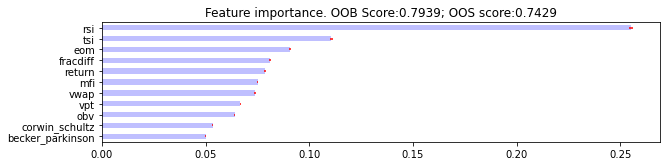

In [32]:
plot_feature_importance(
    mdi,
    oob_score = oob_score,
    oos_score = oos_score,
    save_fig = True,
    output_path = './Daily_MDI_feature_importance.png'
)
plt.grid(False)
plt.show()

In [33]:
from sklearn.metrics import log_loss

#permutation importance
mda = mean_decrease_accuracy(fit, X_train, y_train, cv_gen, scoring = log_loss)

C:\Users\cksdu\OneDrive\문서\바탕 화면\FIND-A\MLFINLAB\FinancialMachineLearning\feature_importance\importance.py:23: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  fold_metrics_values, features_metrics_values = pd.Series(), pd.DataFrame(columns=X.columns)


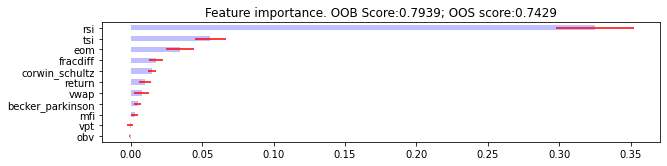

In [34]:
plot_feature_importance(
    mda,
    oob_score = oob_score,
    oos_score = oos_score,
    save_fig = True,
    output_path = './Daily_MDI_feature_importance.png'
)
plt.grid(False)
plt.show()

#### 결과 출력

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

y_prob = forest.predict_proba(X_test)[:, 1]
y_pred = forest.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7109375


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.63      0.66      1217
           1       0.72      0.78      0.75      1471

    accuracy                           0.71      2688
   macro avg       0.71      0.70      0.70      2688
weighted avg       0.71      0.71      0.71      2688



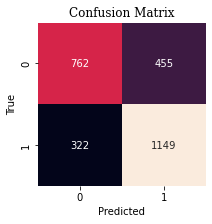

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

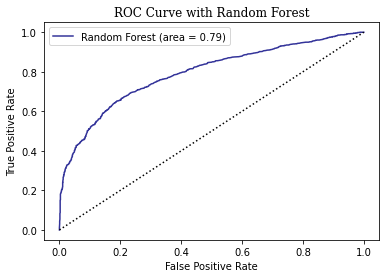

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Random Forest (area = {:.2f})'.format(roc_auc), color = 'navy', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Random Forest', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()

In [39]:
#엔트로피 -> 0.71
#지니 -> 0.68